<a href="https://colab.research.google.com/github/enescicek/repo1/blob/master/nesne_tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
# Drive'a bağlanma işlemi için yetkilendirme kodu alınması gerekebilir
# Ekranda bir bağlantı bağlantısı gösterilecektir. Tıklayarak yetkilendirebilirsiniz.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [23]:
from ultralytics import YOLO
#Burada kullanacağımız modeli seçiyoruz
model = YOLO("yolov8m.pt")

In [26]:
results = model.predict(source="/content/drive/My Drive/YOLOv8_ile_nesne_tespiti/i.jpg",save=True,verbose=False)
#Elimizdeki resmi modele veriyoruz.
#Model ile resim aynı klasörde değilse bu sefer dosya yolunu girmemiz gerekir.
#save=True : Bulduğu sonuçları kaydetmesini isteriz.
#verbose=False : Bulduğu sonuçları çok detaylı yazmasını istemedik.

Results saved to runs/detect/predict


In [27]:
import cv2
import numpy as np

In [28]:
labels=['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush' ]

In [30]:
img = cv2.imread("/content/drive/My Drive/YOLOv8_ile_nesne_tespiti/i.jpg") # opencv ile fotoğrafı yüklüyoruz.
rgb_img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # fotografı bgr uzayından rgb uzayına çeviriyoruz.
result = model(rgb_img) # fotografı modele veriyoruz

In [31]:
result # model sonucları results adlı değişkene kaydetti.değişkeni inceleyebiliriz.

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [32]:
results[0].boxes # nesnelerin fotograf içerisindeki konumları boxes ile bulunur.
                 # nesnelerin skorlarını da burada görebiliriz.

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  2.,  2.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  1.,  2.,  2.,  2.,  1.,  1., 10.])
conf: tensor([0.9138, 0.9092, 0.9066, 0.8884, 0.8869, 0.8832, 0.8092, 0.7279, 0.7089, 0.7075, 0.6885, 0.6386, 0.5454, 0.3943, 0.3474, 0.2841, 0.2813])
data: tensor([[4.2153e+02, 1.6754e+02, 5.9832e+02, 5.5809e+02, 9.1378e-01, 0.0000e+00],
        [9.6580e+02, 2.3068e+02, 1.1083e+03, 3.4310e+02, 9.0917e-01, 2.0000e+00],
        [5.4355e+02, 2.0617e+02, 8.5660e+02, 4.0055e+02, 9.0660e-01, 2.0000e+00],
        [7.8536e+02, 2.0821e+02, 1.0068e+03, 3.6558e+02, 8.8840e-01, 2.0000e+00],
        [1.6150e+03, 1.6546e+02, 1.7263e+03, 4.2222e+02, 8.8690e-01, 0.0000e+00],
        [2.9924e+02, 1.6370e+02, 4.0141e+02, 5.6380e+02, 8.8322e-01, 0.0000e+00],
        [1.0428e+03, 2.2063e+02, 1.1820e+03, 3.2834e+02, 8.0924e-01, 2.0000e+00],
        [1.7816e+03, 2.6500e+02, 1.8780e+03, 4.5742e+02, 7.2789e-01, 1.0000e+00],
        [1.1513e+03, 2.3600e+0

In [33]:
results[0].boxes.xyxy # resimdeki nesnelerin kordinatlarını bu şekilde bulabiliriz.
                      # 1. xy fotografın sol üst köşesinin x ve y kordinatını ifade eder.
                      # # 2. xy fotografın sağ alt köşesinin x ve y kordinatını ifade eder.

tensor([[4.2153e+02, 1.6754e+02, 5.9832e+02, 5.5809e+02],
        [9.6580e+02, 2.3068e+02, 1.1083e+03, 3.4310e+02],
        [5.4355e+02, 2.0617e+02, 8.5660e+02, 4.0055e+02],
        [7.8536e+02, 2.0821e+02, 1.0068e+03, 3.6558e+02],
        [1.6150e+03, 1.6546e+02, 1.7263e+03, 4.2222e+02],
        [2.9924e+02, 1.6370e+02, 4.0141e+02, 5.6380e+02],
        [1.0428e+03, 2.2063e+02, 1.1820e+03, 3.2834e+02],
        [1.7816e+03, 2.6500e+02, 1.8780e+03, 4.5742e+02],
        [1.1513e+03, 2.3600e+02, 1.2157e+03, 3.1471e+02],
        [2.7337e+02, 2.0462e+02, 3.2166e+02, 3.5221e+02],
        [1.3822e+03, 2.7083e+02, 1.4681e+03, 3.8338e+02],
        [1.2019e+03, 2.3708e+02, 1.2576e+03, 3.0520e+02],
        [1.3605e+03, 2.2204e+02, 1.4273e+03, 2.8533e+02],
        [1.2334e+03, 2.3677e+02, 1.2748e+03, 3.0051e+02],
        [1.7213e+03, 2.8051e+02, 1.7967e+03, 3.8989e+02],
        [8.4227e+02, 3.1606e+02, 8.9125e+02, 3.7727e+02],
        [7.5676e-02, 3.3655e+02, 2.4971e+01, 4.5928e+02]])

In [34]:
x1,y1,x2,y2 = results[0].boxes.xyxy[0] # fotograftaki ilk nesnenin kordinatını bu sekilde buluruz.

# Resimde nesne tespiti

In [ ]:
#bu buldugumuz sonucları kullanarak bunları fotograf üzerinde göstermek istersek asagıdaki gibi bir kod yazabiliriz.

In [36]:
from google.colab.patches import cv2_imshow

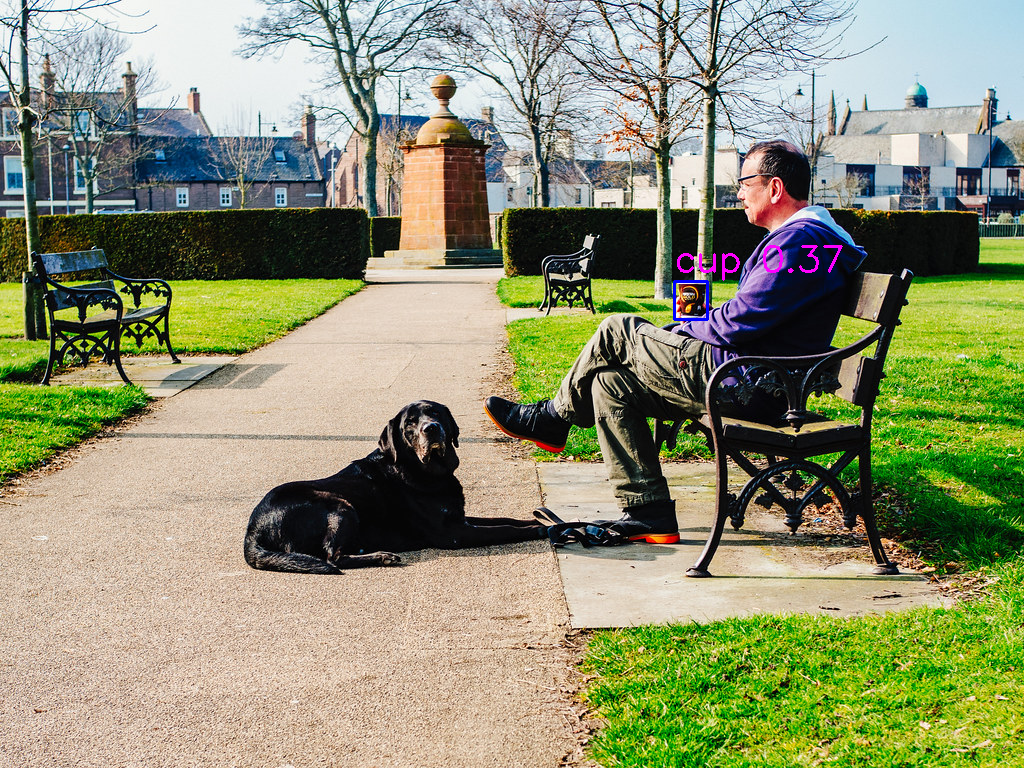

In [40]:
img=cv2.imread('/content/drive/My Drive/YOLOv8_ile_nesne_tespiti/i2.jpg') # resmi yüklüyoruz
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # bgr to rgb
results = model(rgb_img) # modele veriyoruz

font = cv2.FONT_HERSHEY_SIMPLEX # gösterirken kullanacağımız yazıların fontunu ayarlıyoruz.

for i in range(len(results[0].boxes)): # kaç adet nesne varsa o sayıda for döngüsü dönecek
  x1,y1,x2,y2=results[0].boxes.xyxy[i] # her bir nesne için konumlarını alıyoruz
  score=results[0].boxes.conf[i] # her bir nesne için skor bilgilerini alıyoruz
  label=results[0].boxes.cls[i] # her bir nesne için labeldan etiket bilgisini alıyoruz
  x1,y1,x2,y2, score,label=int(x1), int(y1), int(x2), int(y2), float(score), int(label) # uygun formata çeviriyoruz.(tensor formatındaydılar)
  name=labels[label] # hangi sınıfa denk geldiğini buluyoruz
  if score<0.2: # nesnenin skoru %20 den azsa ekranda göstermiyoruz
      continue

cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0),2) #sol üst ve sağ alt köşe kordinatlarını girerek ekranda bulunan her nesneye bir dikdörtgen çizdiriyoruz.
text= name+' '+str(format(score, '.2f')) # nesnenin adını ve skor bilgisini text e atıyoruz
cv2.putText(img, text, (x1, y1-10), font, 1.2, (255,0,255), 2) # text e atadıgımız bilgileri ekranda yazdırıyoruz.

cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Spesifik bir sınıf gösterme

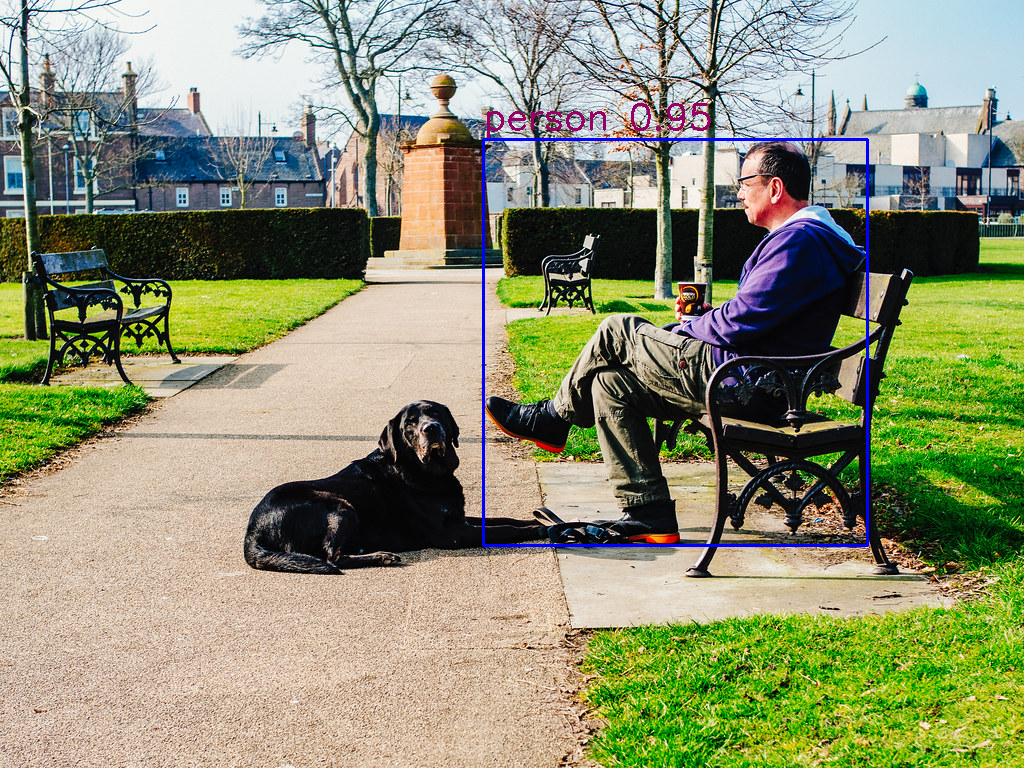

In [43]:
img=cv2.imread("/content/drive/My Drive/YOLOv8_ile_nesne_tespiti/i2.jpg")
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = model (rgb_img)

font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(len(results[0].boxes)):
  x1,y1,x2,y2=results[0].boxes.xyxy[i]
  score=results[0].boxes.conf[i]
  label=results[0].boxes.cls[i]
  x1,y1,x2,y2, score,label=int(x1), int(y1), int(x2), int(y2), float (score), int(label)
  name=labels [label]
  if score<0.5 or name!= 'person': # skor %50 den küçükse veya name person a eşit değilse ekranda göstermiyoruz
      continue

  cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
  text= name+' '+str(format(score, '.2f'))
  cv2.putText(img, text, (x1, y1-10), font, 1.2, (102,0,153), 2)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Videoda nesne tespiti

In [45]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

In [ ]:
kamera= cv2.VideoCapture('video.mp4') # videoyu alıyoruz
font = cv2.FONT_HERSHEY_SIMPLEX # yazı fontunu belirliyoruz


while True:


    ret, kare=kamera.read() # kameradan gelen görüntüleri kare değişkenine aktarıyoruz. ret = True ise görüntü geliyodur. ret = False ise görüntü gelmiyodur.

    imgs=cv2.cvtColor(kare,cv2.COLOR_BGR2RGB)
    results = model (imgs, verbose=False)


    for i in range(len(results[0].boxes)):
        x1,y1,x2,y2=results[0].boxes.xyxy[i]
        score=results[0].boxes.conf[i]
        label=results[0].boxes.cls[i]
        x1,y1,x2,y2,score,label=int(x1), int(y1), int(x2), int(y2), float(score), int(label)
        name=labels[label]
        if score<0.5:
            continue


        cv2.rectangle(kare, (x1,y1), (x2,y2), (255,0,0),2)
        text= name+' '+str(format(score, '.2f'))
        cv2.putText(kare, text, (x1, y1-10), font, 1.2, (255,0,255), 2)

    cv2.imshow("kamera", kare) # ekranda gösteriyoruz.
    if cv2.waitKey(1) & 0xFF== ord('q'): # klavyeden q ya basılırsa çık.
        break
kamera.release() # kamerayı kullanmayı bırak.
cv2.destroyAllWindows() #tüm pencereleri kapat.

# Nesne takibi

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

In [ ]:
import os
os.environ = ["KMP_DUBLICATE_LIB_OK"] = "TRUE" # Nesne takibinde ramimiz dolmaması için yazdık.

In [ ]:
kamera= cv2.VideoCapture('video2.mp4')
font = cv2.FONT_HERSHEY_SIMPLEX


while True:

    ret, kare kamera.read()

    imgs=cv2.cvtColor(kare,cv2.COLOR_BGR2RGB)
    results = model.track (imgs, persist=True, verbose=False) # takip modunda oldugunu söylüyoruz. persist=True diyerek her frame değiştiğinde baştan atamasını engelliyoruz.

    for i in range(len(results[0].boxes)):
        x1,y1,x2,y2=results[0].boxes.xyxy[i]
        score=results[0].boxes.conf[i]
        label=results[0].boxes.cls[i]
        ids=results[0].boxes.id[i] # id leri de alıyoruz
        x1,y1,x2,y2,score,label,ids=int(x1), int(y1), int(x2), int(y2), float(score),int(label),int(ids) # int dorma çevirme işlemini yapıyoruz

        name=labels [label]
        if score<0.1:
            continue

        cv2.rectangle(kare, (x1,y1), (x2,y2), (255,0,0), 2)
        text= name+' '+str(ids)+' '+str(format(score, '.2f')) # nesnenin adı,id si ,skoru gözükecek sırada ekranda göstereceğiz.
        cv2.putText(kare, text, (x1, y1-10), font, 1.2, (102,0,153), 2) # ekrana yazıları ekler

    cv2.imshow("kamera", kare) # görüntüyü gösterme işlemi.
    if cv2.waitKey(1) & 0xFF == ord('q'): # klavyeden q ya basılırsa çık.
        break

kamera.release()
cv2.destroyAllWindows()

In [20]:
import os

file_path = "//path//to//My Drive//YOLOv8_ile_nesne_tespiti//i.jpg"

# Dosya var mı kontrol et
if os.path.exists(file_path):
    results = model.predict(source=file_path, save=True, verbose=False)
else:
    print(f"Dosya bulunamadı: {file_path}")



Dosya bulunamadı: //path//to//My Drive//YOLOv8_ile_nesne_tespiti//i.jpg
